Name: Krishna Yadav
Email: kyadav932000@gmail.com

<h1>Data Preprocessing</h1>

<h2>Importing DataSet</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset  = pd.read_csv("Fraud.csv")
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<h2>Removing unnecessary dataset</h2>
Feature selection with correlation<br>
We discard features that are not correlated with our isFraud data

<h3>Label Encoding</h3>

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
dataset['nameOrig'] = le.fit_transform(dataset['nameOrig'].astype(str))
dataset['nameDest'] = le.fit_transform(dataset['nameDest'].astype(str))
#encoding every variable to a number

Drawing the correlation matrix

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kyada\AppData\Local\Temp\ipykernel_6112\4258115863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


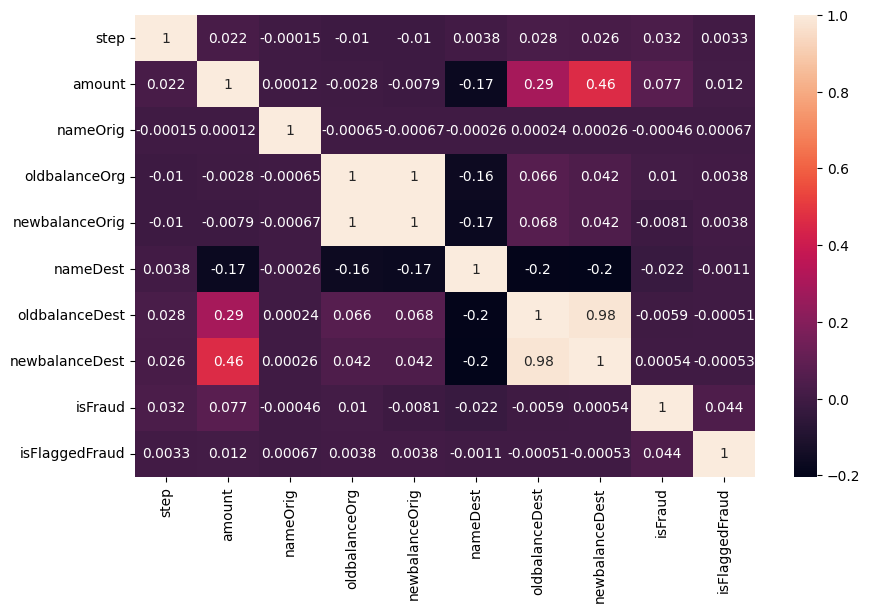

In [6]:
corr=dataset.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

From above Corelation matrix we can see that fraud column has correaltion with type, step, amount, isFlaggedFraud, original amount in bank.

In [7]:
X = pd.DataFrame(dataset)
cols = [0,1,2,4,10]
X = X[X.columns[cols]]

In [8]:
y = dataset.iloc[:,9]
y = np.array(y)

<h2>Taking Care of Missing data</h2>

In [9]:
dataset.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing data

<h2>One hot encoding</h2>

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

<h2>Dealing with imbalanced dataset</h2>

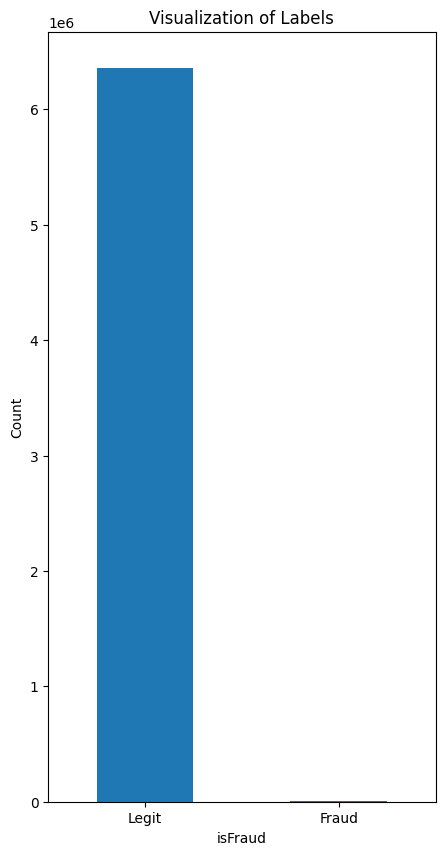

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = dataset.value_counts(dataset['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [12]:
print(f'Number of Zeroes {np.size(y)-np.sum(y)} and Number of Ones {np.sum(y)}')

Number of Zeroes 6354407 and Number of Ones 8213


In [13]:
ans = (np.sum(y)/np.size(y))*100
ans

0.12908204481801522

The dataset is highly imbalance<br>
We will apply undersampling on the dataset

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


In [15]:
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 8213, 1: 8213})


<h2>Splitting the dataset into training and test set</h2>

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.1, random_state = 42)

In [17]:
X_train[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.5300000e+02, 3.4138283e+05, 1.3179000e+04,
       0.0000000e+00])

<h2>Feature Scaling</h2>

In [18]:
# #feature Scaling the amount in X_train and X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7] = sc.fit_transform(X_train[:, 7].reshape(-1,1)).reshape(1,-1)
X_test[:, 7] = sc.transform(X_test[:, 7].reshape(-1,1)).reshape(1,-1)
X_train[:, 6] = sc.fit_transform(X_train[:, 6].reshape(-1,1)).reshape(1,-1)
X_test[:, 6] = sc.transform(X_test[:, 6].reshape(-1,1)).reshape(1,-1)

In [19]:
X_train[0]

array([  1.        ,   0.        ,   0.        ,   0.        ,
         0.        , 253.        ,  -0.25807571,  -0.37935716,
         0.        ])

<h1>Modelling</h1>

<h2>1. Logistic Regression - Base Model</h2>

<h3>Model</h3>

In [20]:
from sklearn.linear_model import LogisticRegression
classifier_lR = LogisticRegression()

In [21]:
classifier_lR.fit(X_train,y_train)

C:\Users\kyada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h3>Finding the test cell result</h3>

In [22]:
y_pred_lR = classifier_lR.predict(X_test)
print(np.concatenate((y_pred_lR.reshape(-1,1),y_test.reshape(-1,1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


<h3>Making the confusion matrix</h3>

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [24]:
cm_lR = confusion_matrix(y_test,y_pred_lR)
print(cm_lR)
accuracy_score(y_test,y_pred_lR)

[[684 151]
 [ 83 725]]


0.8575776019476568

Efficiency of our base model is 85.75% in test result

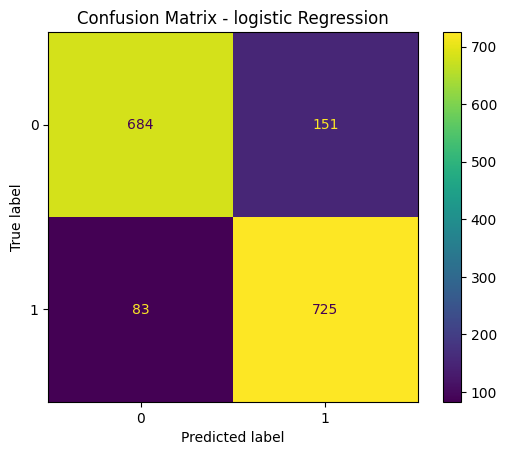

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lR)
disp.plot()
plt.title('Confusion Matrix - logistic Regression')
plt.show()

<h2>2. Decision tree</h2>

<h3>Model</h3>

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier_dT = DecisionTreeClassifier()

In [28]:
classifier_dT.fit(X_train,y_train)

DecisionTreeClassifier()

<h3>Finding the test result</h3>

In [29]:
y_pred_dT = classifier_dT.predict(X_test)
print(np.concatenate((y_pred_dT.reshape(-1,1),y_test.reshape(-1,1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


<h3>Making the confusion matrix</h3>

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [31]:
cm_dT = confusion_matrix(y_test,y_pred_dT)
print(cm_dT)
accuracy_score(y_test,y_pred_dT)

[[827   8]
 [  6 802]]


0.9914790018259282

Efficiency is increased in our decision tree model to 99.14%

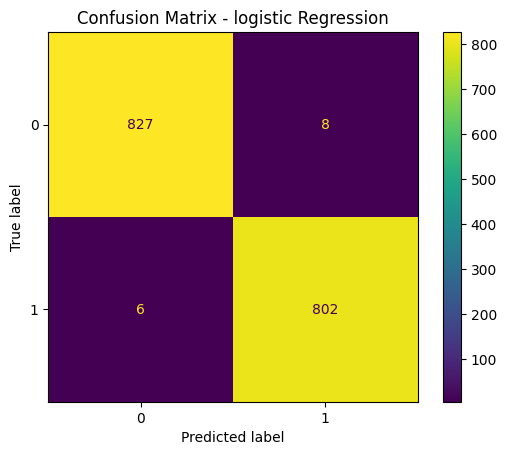

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dT)
disp.plot()
plt.title('Confusion Matrix - logistic Regression')
plt.show()

<h1>3. Random forest</h1>

<h3>Model</h3>

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_rF = RandomForestClassifier(n_estimators=200, criterion = 'entropy' , random_state=0)

In [34]:
classifier_rF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

<h3>Finding the test result</h3>

In [36]:
y_pred_rF = classifier_rF.predict(X_test)
print(np.concatenate((y_pred_rF.reshape(-1,1),y_test.reshape(-1,1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


<h3>Making the confusion matrix</h3>

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [38]:
cm_rF = confusion_matrix(y_test,y_pred_rF)
print(cm_rF)
accuracy_score(y_test,y_pred_rF)

[[823  12]
 [  3 805]]


0.9908703590992087

Our final model Random forest has efficiency of 99.08%

We will take random forest as our final model and not decision tree as it has more stability towards new data points

<h2>Complete Dataset</h2>

We'll check our random forest model in the whole dataset

In [39]:
sc = StandardScaler()
X[:, 7] = sc.fit_transform(X[:, 7].reshape(-1,1)).reshape(1,-1)
X[:, 6] = sc.fit_transform(X[:, 6].reshape(-1,1)).reshape(1,-1)

In [40]:
y_pred_rF_full = classifier_rF.predict(X)

In [41]:
cm_full = confusion_matrix(y,y_pred_rF_full)
print(cm_full)
accuracy_score(y,y_pred_rF_full)

[[5463559  890848]
 [    406    7807]]


0.859923427770321

We get our final efficiency value on the whole initial dataset as 86%

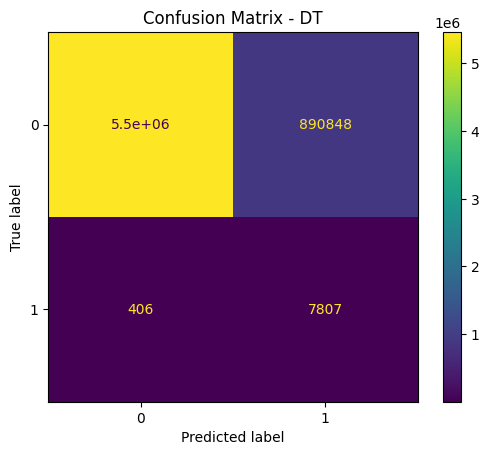

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_full)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()